In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

In [2]:
df = pd.read_csv('movies.csv', encoding='unicode_escape')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} {}%".format(col, pct_missing))

budget 0.0%
company 0.0%
country 0.0%
director 0.0%
genre 0.0%
gross 0.0%
name 0.0%
rating 0.0%
released 0.0%
runtime 0.0%
score 0.0%
star 0.0%
writer 0.0%
year 0.0%


In [4]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [5]:
df['budget'] = df['budget'].astype(np.int_)
df['gross'] = df['gross'].astype(dtype= np.int_)
df.head(2)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986


In [6]:
dates = pd.to_datetime(df['released'], errors= 'coerce')
dates.isna().sum()

8

In [7]:
df.loc[dates.isna(), ['name', 'country', 'director','released', 'year']]

,name,country,director,released,year
57,Sacrifice,Sweden,Andrei Tarkovsky,1986-11,1986
138,Near Dark,USA,Kathryn Bigelow,1988,1987
291,Stormy Monday,UK,Mike Figgis,1988-05,1988
431,La Femme Nikita,France,Luc Besson,1991-04,1990
488,The Comfort of Strangers,USA,Paul Schrader,1991-04,1990
646,"Jamón, Jamón",Spain,Bigas Luna,1994-02,1992
756,Killing Zoe,France,Roger Avary,1994-09,1993
768,Cronos,Mexico,Guillermo del Toro,1994-05,1993


In [8]:
corrected_formatted_dates = ['1986-05-09', '1987-12-12', '1988-04-22', '1990-04-21', '1990-11-30', 
                             '1992-09-04', '1994-04-19', '1993-11-03']
df.loc[dates.isna(), 'released'] = corrected_formatted_dates
df.loc[dates.isna()]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
57,0,Svenska Filminstitutet (SFI),Sweden,Andrei Tarkovsky,Drama,300653,Sacrifice,PG,1986-05-09,149,8.1,Erland Josephson,Andrei Tarkovsky,1986
138,5000000,F/M,USA,Kathryn Bigelow,Action,3369307,Near Dark,R,1987-12-12,94,7.0,Adrian Pasdar,Kathryn Bigelow,1987
291,0,Atlantic Entertainment Group,UK,Mike Figgis,Crime,1791328,Stormy Monday,R,1988-04-22,93,6.3,Melanie Griffith,Mike Figgis,1988
431,0,Gaumont,France,Luc Besson,Action,5017971,La Femme Nikita,R,1990-04-21,117,7.4,Anne Parillaud,Luc Besson,1990
488,0,Erre Produzioni,USA,Paul Schrader,Drama,1244381,The Comfort of Strangers,R,1990-11-30,107,6.4,Christopher Walken,Ian McEwan,1990
646,0,Lolafilms,Spain,Bigas Luna,Comedy,938473,"Jamón, Jamón",UNRATED,1992-09-04,95,6.5,Penélope Cruz,Cuca Canals,1992
756,1500000,Davis-Films,France,Roger Avary,Crime,418953,Killing Zoe,R,1994-04-19,96,6.5,Eric Stoltz,Roger Avary,1993
768,2000000,CNCAIMC,Mexico,Guillermo del Toro,Horror,621392,Cronos,R,1993-11-03,94,6.7,Federico Luppi,Guillermo del Toro,1993


In [9]:
df['released'] = pd.to_datetime(df['released'])

In [10]:
df.loc[df['released'].dt.year != df['year'], ['name', 'country', 'director','released', 'year']]

,name,country,director,released,year
5,Platoon,UK,Oliver Stone,1987-02-06,1986
32,River's Edge,USA,Tim Hunter,1987-05-08,1986
50,Hoosiers,UK,David Anspaugh,1987-02-27,1986
52,Henry: Portrait of a Serial Killer,USA,John McNaughton,1990-09-07,1986
88,Allan Quatermain and the Lost City of Gold,USA,Gary Nelson,1987-01-30,1986
...,...,...,...,...,...
3079,Live by Night,USA,Ben Affleck,2017-01-13,2016
3090,Free Fire,UK,Ben Wheatley,2017-04-21,2016
3092,Lady Macbeth,UK,William Oldroyd,2017-07-14,2016
3093,The Exception,UK,David Leveaux,2017-06-02,2016


In [11]:
(df['released'].dt.year != df['year']).sum()

455

In [12]:
df['year'] = df['released'].dt.year
(df['released'].dt.year != df['year']).sum()

0

In [13]:
df = df.sort_values(by=['gross'], ascending= False)

In [14]:
df.duplicated(keep= 'first').sum()

0

<Axes: xlabel='budget', ylabel='gross'>

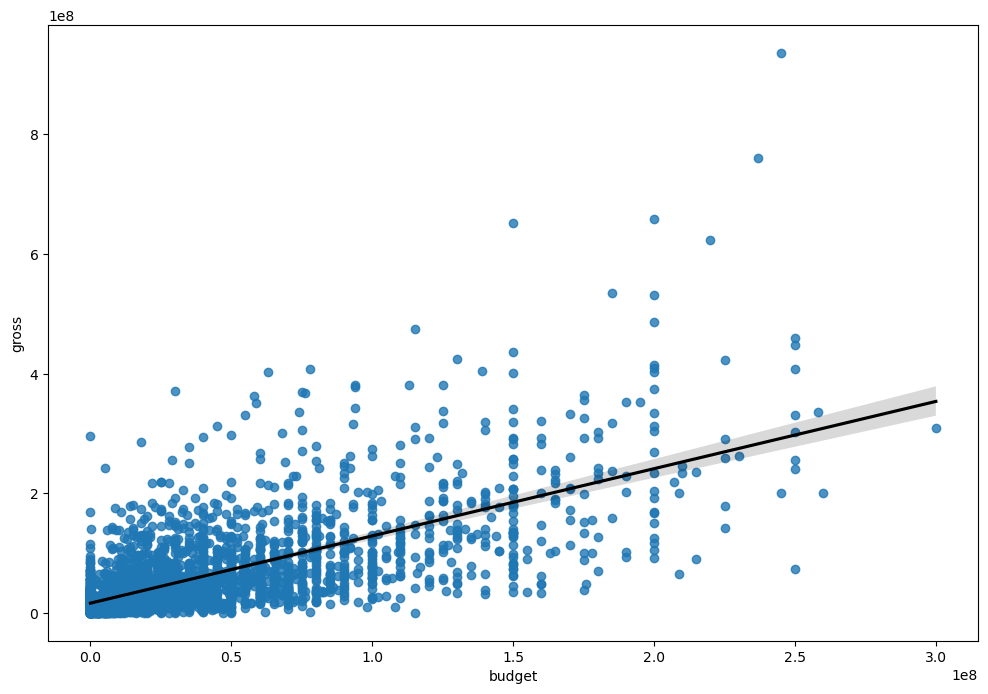

In [15]:
sns.regplot(x= 'budget', y= 'gross', data= df, line_kws= {'color': 'black'})

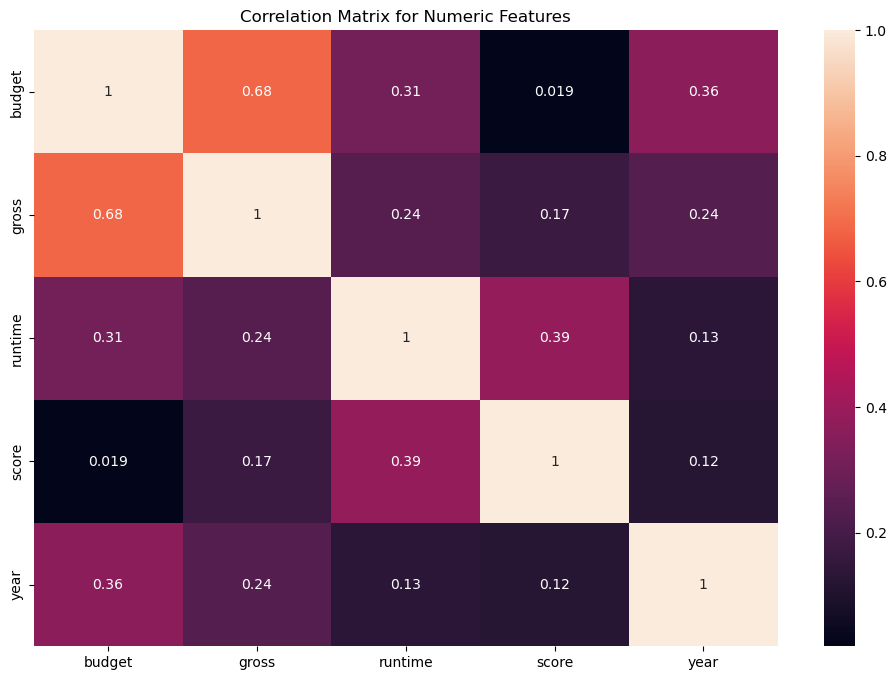

In [16]:
corr_matrix = df.corr(numeric_only= True)

sns.heatmap(corr_matrix, annot= True)

plt.title("Correlation Matrix for Numeric Features")

plt.show()

In [17]:
df_numeric = df.copy()
# Turning the string columns into numerical data
for col in df_numeric.columns:
    if df_numeric[col].dtype == np.object_:
        df_numeric[col] = pd.Categorical(df_numeric[col])
        df_numeric[col] = df_numeric[col].cat.codes
        
df_numeric

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
2903,245000000,574,37,468,0,936662225,2146,5,2015-12-18,136,8.1,236,1106,2015
2302,237000000,837,36,478,0,760507625,219,5,2009-12-18,162,7.8,986,768,2009
1100,200000000,837,37,478,6,658672302,2852,5,1997-12-19,194,7.8,699,768,1997
2916,150000000,846,37,207,0,652270625,1246,5,2015-06-12,124,7.0,203,1545,2015
2603,220000000,596,37,656,0,623357910,2276,5,2012-05-04,143,8.1,946,1010,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,894,9,706,6,5000,1310,6,2015-02-27,92,6.7,736,80,2015
1074,0,119,9,880,5,4440,1807,2,1996-08-30,105,7.4,669,851,1996
2311,47000000,663,3,473,6,3600,1553,6,2013-09-26,141,7.9,499,764,2013
1466,5000000,265,5,584,6,2554,826,7,2001-05-18,108,6.8,352,1033,2001


In [18]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,Zentropa Entertainments,Denmark,Kristian Levring,Drama,5000,La salvación,R,2015-02-27,92,6.7,Mads Mikkelsen,Anders Thomas Jensen,2015
1074,0,Balboa Entertainment,Denmark,Nicolas Winding Refn,Crime,4440,Pusher,NOT RATED,1996-08-30,105,7.4,Kim Bodnia,Jens Dahl,1996
2311,47000000,Pan Européenne,Belgium,Jaco Van Dormael,Drama,3600,Mr. Nobody,R,2013-09-26,141,7.9,Jared Leto,Jaco Van Dormael,2013
1466,5000000,Copperheart Entertainment,Canada,John Fawcett,Drama,2554,Feroz,UNRATED,2001-05-18,108,6.8,Emily Perkins,Karen Walton,2001


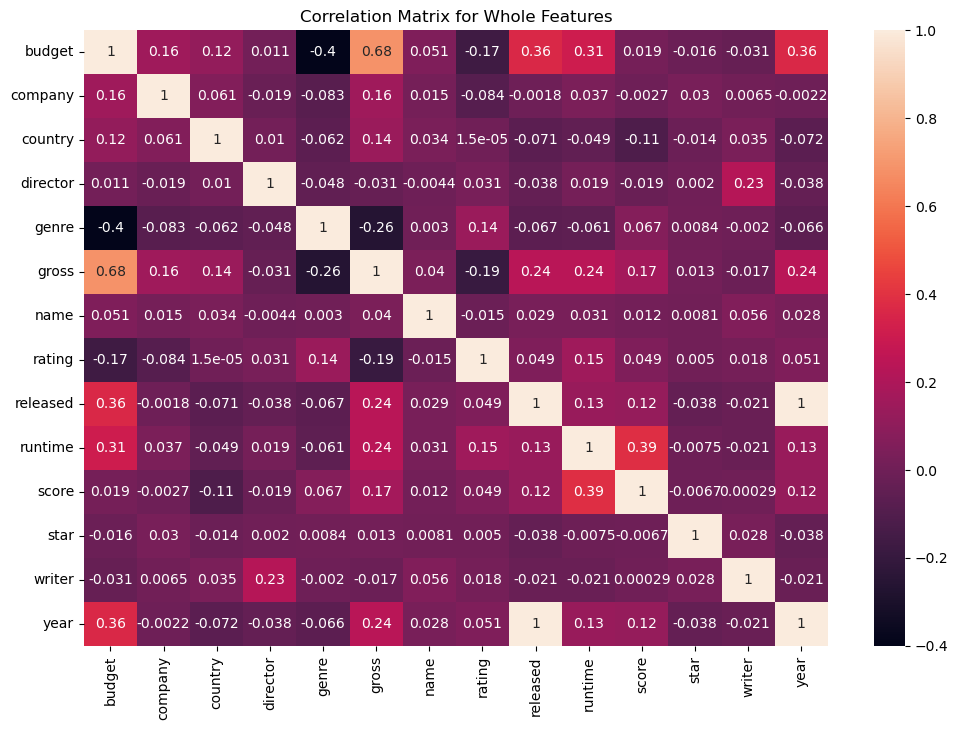

In [19]:
corr_numeric_matrix = df_numeric.corr()

sns.heatmap(corr_numeric_matrix, annot= True)

plt.title("Correlation Matrix for Whole Features")

plt.show()

In [20]:
corr_numeric_matrix

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
budget,1.000000,0.157083,0.118863,0.011052,-0.401052,0.682588,0.051049,-0.171070,0.364893,0.309652,0.019061,-0.016357,-0.031269,0.361819
company,0.157083,1.000000,0.061089,-0.018730,-0.083068,0.156013,0.014947,-0.083646,-0.001781,0.037491,-0.002730,0.030054,0.006527,-0.002219
country,0.118863,0.061089,1.000000,0.010291,-0.062478,0.138064,0.034133,0.000015,-0.070869,-0.049398,-0.113568,-0.014146,0.035367,-0.071983
director,0.011052,-0.018730,0.010291,1.000000,-0.048337,-0.031221,-0.004434,0.030589,-0.038406,0.018846,-0.018591,0.001973,0.227905,-0.038381
genre,-0.401052,-0.083068,-0.062478,-0.048337,1.000000,-0.263051,0.002989,0.136055,-0.066820,-0.061327,0.067234,0.008380,-0.001986,-0.066007
gross,0.682588,0.156013,0.138064,-0.031221,-0.263051,1.000000,0.039578,-0.191666,0.237498,0.238183,0.171825,0.013428,-0.017184,0.235080
name,0.051049,0.014947,0.034133,-0.004434,0.002989,0.039578,1.000000,-0.014934,0.029352,0.031283,0.011649,0.008144,0.055729,0.027699
rating,-0.171070,-0.083646,0.000015,0.030589,0.136055,-0.191666,-0.014934,1.000000,0.049414,0.153396,0.048781,0.004985,0.017506,0.050880
released,0.364893,-0.001781,-0.070869,-0.038406,-0.066820,0.237498,0.029352,0.049414,1.000000,0.133145,0.120813,-0.038013,-0.021151,0.999475
runtime,0.309652,0.037491,-0.049398,0.018846,-0.061327,0.238183,0.031283,0.153396,0.133145,1.000000,0.386864,-0.007494,-0.020986,0.130749


In [21]:
corr_stacked = corr_numeric_matrix.unstack()
corr_stacked

budget  budget      1.000000
        company     0.157083
        country     0.118863
        director    0.011052
        genre      -0.401052
                      ...   
year    runtime     0.130749
        score       0.119806
        star       -0.038300
        writer     -0.021422
        year        1.000000
Length: 196, dtype: float64

In [22]:
pd.set_option('display.max_rows', None)
corr_stacked_sorted = corr_stacked.sort_values()
corr_stacked_sorted

budget    genre      -0.401052
genre     budget     -0.401052
gross     genre      -0.263051
genre     gross      -0.263051
gross     rating     -0.191666
rating    gross      -0.191666
          budget     -0.171070
budget    rating     -0.171070
score     country    -0.113568
country   score      -0.113568
rating    company    -0.083646
company   rating     -0.083646
genre     company    -0.083068
company   genre      -0.083068
country   year       -0.071983
year      country    -0.071983
country   released   -0.070869
released  country    -0.070869
          genre      -0.066820
genre     released   -0.066820
year      genre      -0.066007
genre     year       -0.066007
          country    -0.062478
country   genre      -0.062478
runtime   genre      -0.061327
genre     runtime    -0.061327
runtime   country    -0.049398
country   runtime    -0.049398
director  genre      -0.048337
genre     director   -0.048337
released  director   -0.038406
director  released   -0.038406
        

In [23]:
high_corr = corr_stacked_sorted[(corr_stacked_sorted) > 0.5]
high_corr

gross     budget      0.682588
budget    gross       0.682588
year      released    0.999475
released  year        0.999475
budget    budget      1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
rating    rating      1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64